## Part 1: WeatherPy

In this section, you'll create a Python script to visualize the weather of 500+ cities of varying distance from the equator. To do so, you'll use a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and your problem-solving skills to create a representative model of weather across cities.

The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

The second requirement is to compute the linear regression for each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeated) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed, with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#save initial url
url ="https://api.openweathermap.org/data/2.5/weather?"
units= 'imperial'

#build target url to call #q= to call city names
target_url = f'{url}appid={weather_api_key}&units={units}&q='


In [5]:
# Set up lists to hold response info:
name=[]         #list cities with no error
cloud=[]        # list cloudines
ctry=[]         # list country
date=[]         # list date
humid=[]         # list humidity
lat=[]          # list latitude
long=[]          # list longitude
maxtemp=[]      # list max temperature
wind=[]         # list wind speed

count=0 # set counter to print to match with provided result
set = 1

In [6]:
# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:



print('Beginning Data Retrieval')     
print('-----------------------------')
#for loop to retrieve data 
for city in cities:
         try:       # To skip errors in case a city is not foud.
            response=requests.get(target_url + city).json()
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humid.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])    
            if count > 48: #change the count record and the set record. if count >50. first record will start w 2
                count= 1
                set +=1
                name.append(response['name'])
            else:
                count += 1
                name.append(response['name'])
                print(f'Processing Record {count} of Set {set} | {city}')    
        except KeyError:
            print(city + 'city not found. Skipping...') 
time.sleep(.5)                                                           
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')      

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | port alfred
ngukurrcity not found. Skipping...
Processing Record 5 of Set 1 | penzance
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | sri aman
illoqqortoormiutcity not found. Skipping...
formoso do araguaiacity not found. Skipping...
rawannawicity not found. Skipping...
Processing Record 8 of Set 1 | yulara
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | corum
Processing Record 16 of Set 1 | berlevag
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | marsh harbour
Processing Record 19 of Set 1 | kapaa


Processing Record 33 of Set 4 | daru
Processing Record 34 of Set 4 | castro
Processing Record 35 of Set 4 | havelock
Processing Record 36 of Set 4 | paidha
Processing Record 37 of Set 4 | shitkino
sentyabrskiycity not found. Skipping...
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | kulhudhuffushi
Processing Record 40 of Set 4 | svetlyy
Processing Record 41 of Set 4 | celestun
Processing Record 42 of Set 4 | kodinsk
Processing Record 43 of Set 4 | mitu
Processing Record 44 of Set 4 | beira
Processing Record 45 of Set 4 | fairbanks
tasbugetcity not found. Skipping...
Processing Record 46 of Set 4 | torquay
Processing Record 47 of Set 4 | ibimirim
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | coahuayana
Processing Record 1 of Set 5 | chimoio
Processing Record 2 of Set 5 | launceston
Processing Record 3 of Set 5 | lae
taburicity not found. Skipping...
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | saint george
Proces

Processing Record 25 of Set 8 | mitikas
Processing Record 26 of Set 8 | copiapo
Processing Record 27 of Set 8 | valdivia
Processing Record 28 of Set 8 | isangel
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | weinan
Processing Record 31 of Set 8 | calabozo
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | dmitriyevka
chagdacity not found. Skipping...
Processing Record 34 of Set 8 | wang noi
Processing Record 35 of Set 8 | mormugao
Processing Record 36 of Set 8 | pemangkat
Processing Record 37 of Set 8 | campoverde
Processing Record 38 of Set 8 | calvinia
Processing Record 39 of Set 8 | mati
Processing Record 40 of Set 8 | road town
Processing Record 41 of Set 8 | kwekwe
Processing Record 42 of Set 8 | goure
Processing Record 43 of Set 8 | markivka
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | mayskiy
Processing Record 46 of Set 8 | evanston
Processing Record 47 of Set 8 | nizhnyaya omka
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
weather = {'City': name,
    'Lat': lat,
    'Lng': long,
    'Max Temp': maxtemp,       
    'Humidity': humid,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Country':ctry,
    'Date':date}

weather_data=pd.DataFrame(weather)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,31.55,62,10,4.16,GL,1661783869
1,Ponta do Sol,32.6667,-17.1000,77.63,67,79,3.33,PT,1661783424
2,Nanortalik,60.1432,-45.2371,40.19,93,90,10.36,GL,1661783870
3,Port Alfred,-33.5906,26.8910,55.18,88,100,8.01,ZA,1661783870
4,Penzance,50.1186,-5.5371,70.92,56,20,21.85,GB,1661783566


In [111]:
#ouput csv
weather_data.to_csv(output_data_file, index=False)

In [10]:
#inpect data using describe
weather_data.describe()

#no city humidity >100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.834163,16.333851,70.187941,68.757353,58.284926,8.560643,1.661784e+09
std,33.574846,89.232022,15.287893,22.887424,38.790528,5.888398,1.155521e+02
min,-54.800000,-179.166700,31.550000,7.000000,0.000000,0.000000,1.661783e+09
25%,-9.815175,-62.186250,58.010000,57.750000,20.000000,4.240000,1.661784e+09
50%,21.722250,21.632450,73.355000,75.000000,75.000000,7.280000,1.661784e+09
75%,47.951525,96.188875,81.230000,86.000000,99.000000,11.485000,1.661784e+09
max,78.218600,179.316700,108.700000,100.000000,100.000000,34.740000,1.661784e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

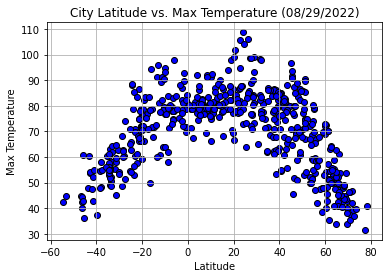

In [34]:
# Build a scatter plot for all cities vs max. temp using latitude:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', edgecolors='black', color='blue')
plt.title('City Latitude vs. Max Temperature (08/29/2022)')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp.png')

# Show plot:
plt.show()

This plot shows the max change in temperature for a list of differents cities depending on their distance awayfrom the equator on both hemispheres.

The plit also shows a strong correlation between lattitude and high temperature. Closer to the equator higher the temperature

## Latitude vs. Humidity Plot

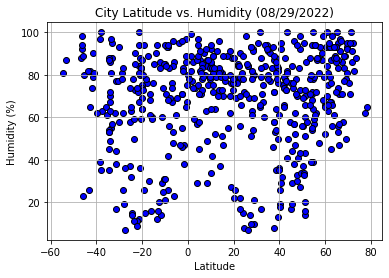

In [37]:
# Build a scatter plot for all cities vs humidity level using latitude:
plt.figure
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', edgecolors='black', color='blue')
plt.title('City Latitude vs. Humidity (08/29/2022)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity.png')

# Show plot:
plt.show()

The plot shows that there is likely no correlation between the latitude and the humidity % on both hemisphere, but the hummidity is likely to be higher near the equator

## Latitude vs. Cloudiness Plot

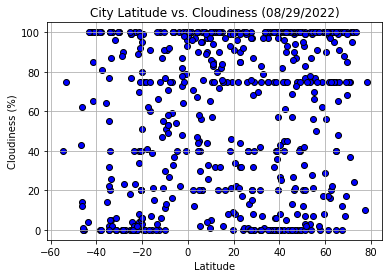

In [38]:
# Build a scatter plot for all cities vs cloudiness level:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', edgecolors='black', color='blue')

# Incorporate the other graph properties:
plt.title('City Latitude vs. Cloudiness (08/29/2022)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

The data shows no correlation between Latitude and Cloudiness. 

## Latitude vs. Wind Speed Plot

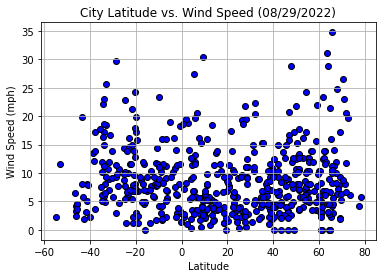

In [39]:
# Build a scatter plot for all cities vs cloudiness level:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', edgecolors='black', color='blue')

# Incorporate the other graph properties:
plt.title('City Latitude vs. Wind Speed (08/29/2022)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/City Latitude vs. Wind Speed.png')

# Show plot
plt.show()

This plot demonstrates little to no correlation between wind speed and latitude on both hemispheres.

## Linear Regression

In [112]:
#south hemp data frame
south_hem = weather_data.loc[weather_data['Lat']<0]
south_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 3 to 543
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        176 non-null    object 
 1   Lat         176 non-null    float64
 2   Lng         176 non-null    float64
 3   Max Temp    176 non-null    float64
 4   Humidity    176 non-null    int64  
 5   Cloudiness  176 non-null    int64  
 6   Wind Speed  176 non-null    float64
 7   Country     176 non-null    object 
 8   Date        176 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 13.8+ KB


In [114]:
#north hemp data frame
north_hem = weather_data.loc[weather_data["Lat"]>=0]
north_hem.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 542
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        368 non-null    object 
 1   Lat         368 non-null    float64
 2   Lng         368 non-null    float64
 3   Max Temp    368 non-null    float64
 4   Humidity    368 non-null    int64  
 5   Cloudiness  368 non-null    int64  
 6   Wind Speed  368 non-null    float64
 7   Country     368 non-null    object 
 8   Date        368 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.8+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.7030751255696817


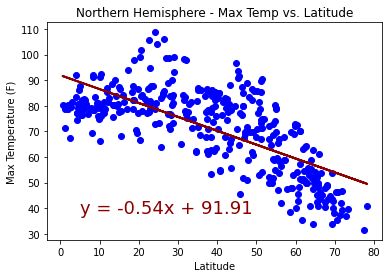

In [64]:
# Build scatter plot for each data type:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values and correlation:
regress_values = x_values * slope + intercept
correlation = st.pearsonr(x_values, y_values)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(5, 38), fontsize=18, color='darkred')
print(f'The r-value is {correlation[0]}')


# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()


There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere. The further north from the equator a city is the lower its max temperature is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.789435441549832


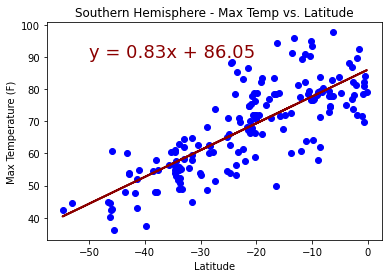

In [78]:
# Build scatter plot for each data type:
x_values1 = south_hem['Lat']
y_values1 = south_hem['Max Temp']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)

# Get regression values and correlation:
regress_values1 = x_values1 * slope + intercept
correlation1 = st.pearsonr(x_values1, y_values1)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values1,y_values1, marker='o', color='blue')
plt.plot(x_values1,regress_values1, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50, 90), fontsize=18, color='darkred')
print(f'The r-value is {correlation1[0]}')


# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_Southern.png')

# Show plot:
plt.show()


There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere. Cities that are closer to the hemisphere recorded higher max temperature and the max temp gradually decreased where a city is further away from the equator. 



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.032639094150699856


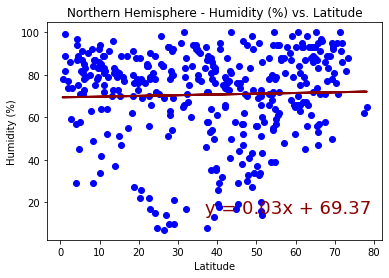

In [85]:
# Build scatter plot for each data type:
x_values2 = north_hem['Lat']
y_values2 = north_hem['Humidity']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)

# Get regression values and correlation:
regress_values2 = x_values2 * slope + intercept
correlation2 = st.pearsonr(x_values2, y_values2)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values2,y_values2, marker='o', color='blue')
plt.plot(x_values2,regress_values2, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(37, 15), fontsize=18, color='darkred')
print(f'The r-value is {correlation2[0]}')


# Save the figure:
plt.savefig('output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png')

# Show plot:
plt.show()


In my opinion, there is no correlation between the latitude and the humidity level on the North Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.04854811379204259


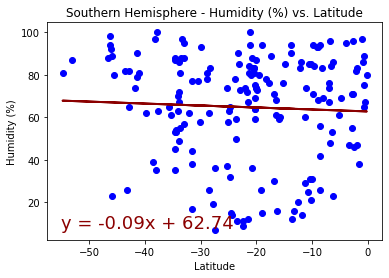

In [92]:
# Build scatter plot for each data type:
x_values3 = south_hem['Lat']
y_values3 = south_hem['Humidity']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)

# Get regression values and correlation:
regress_values3 = x_values3 * slope + intercept
correlation3 = st.pearsonr(x_values3, y_values3)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values3,y_values3, marker='o', color='blue')
plt.plot(x_values3,regress_values3, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55, 8), fontsize=18, color='darkred')
print(f'The r-value is {correlation3[0]}')


# Save the figure:
plt.savefig('output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png')

# Show plot:
plt.show()

In my opinion, there is no correlation between the latitude and the humidity level on the South Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.05257898706432275


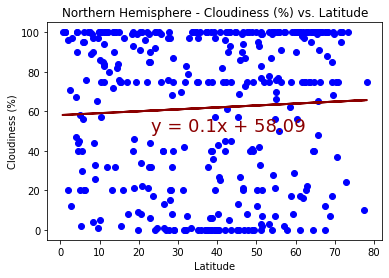

In [97]:
# Build scatter plot for each data type:
x_values4 = north_hem['Lat']
y_values4 = north_hem['Cloudiness']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)

# Get regression values and correlation:
regress_values4 = x_values4 * slope + intercept
correlation4 = st.pearsonr(x_values4, y_values4)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values4,y_values4, marker='o', color='blue')
plt.plot(x_values4,regress_values4, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(23,50), fontsize=18, color='darkred')
print(f'The r-value is {correlation4[0]}')


# Save the figure:
plt.savefig('output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png')

# Show plot:
plt.show()

There is no correlation between the cloudiness level and a latitude on the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.15414683496027126


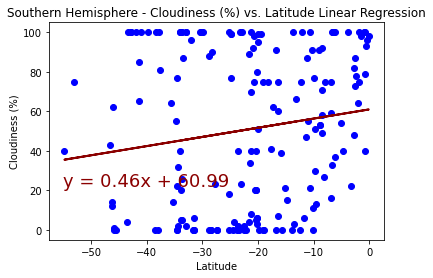

In [100]:
# Build scatter plot for each data type:
x_values5 = south_hem['Lat']
y_values5 = south_hem['Cloudiness']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)

# Get regression values and correlation:
regress_values5 = x_values5 * slope + intercept
correlation5 = st.pearsonr(x_values5, y_values5)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values5,y_values5, marker='o', color='blue')
plt.plot(x_values5,regress_values5, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55, 22), fontsize=18, color='darkred')
print(f'The r-value is {correlation5[0]}')


# Save the figure:
plt.savefig('output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot:
plt.show()

There is no clear correlation between the cloudiness level and latitude on the south hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1381572235351911


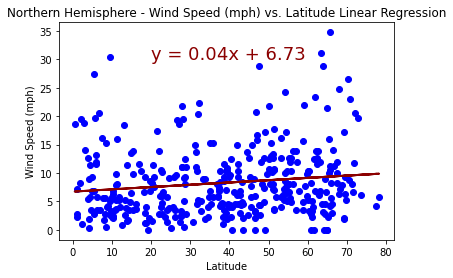

In [106]:
# Build scatter plot for each data type:
x_values6 = north_hem['Lat']
y_values6 = north_hem['Wind Speed']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)

# Get regression values and correlation:
regress_values6 = x_values6 * slope + intercept
correlation6 = st.pearsonr(x_values6, y_values6)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values6,y_values6, marker='o', color='blue')
plt.plot(x_values6,regress_values6, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20, 30), fontsize=18, color='darkred')
print(f'The r-value is {correlation6[0]}')


# Save the figure:
plt.savefig('output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot:
plt.show()

There is a low correlation between the wind speed and a latitude on the Northern Hemisphere. Majority of cities recorded wind speedn between 0-15 mph across the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.06981959811476976


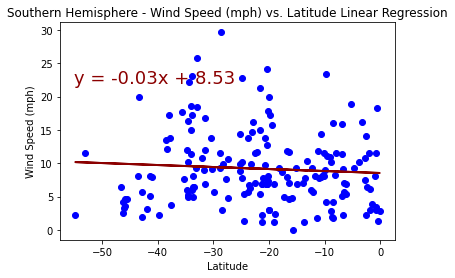

In [103]:
# Build scatter plot for each data type:
x_values7 = south_hem['Lat']
y_values7 = south_hem['Wind Speed']

# set up linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)

# Get regression values and correlation:
regress_values7 = x_values7 * slope + intercept
correlation7 = st.pearsonr(x_values7, y_values7)


# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values7,y_values7, marker='o', color='blue')
plt.plot(x_values7,regress_values7, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55, 22), fontsize=18, color='darkred')
print(f'The r-value is {correlation7[0]}')


# Save the figure:
plt.savefig('output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot:
plt.show()

There is a very low negative correlation between a wind speed and a latitude on the Southern Hemisphere.


Conclusion: 
    1/ the further a city is away from the equator on both hemisphere, the maximum temperature decreases
    2/ there is no correlation between humidity levels and latitude on the Northern Hemisphere. Both hemispheres have a wide range of humidity %, between 10% and 100%, independent of a latitude. Also, on the equator, the humidity level is more than 20%. 
    3/ there is no correlation between cloudiness and latitude on both hemispheres. Majority of cities have wind speed between 0 to 20 mph, independent of a latitude on both hemispheres.
